In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt
import warnings
import missingno as msno
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
print('Dataset Information:')
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


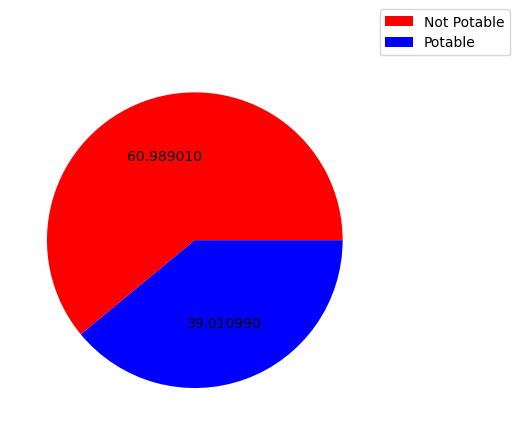

In [6]:
plt.pie(df['Potability'].value_counts(), autopct="%f", colors=['red', 'blue'], radius=1)
plt.legend(['Not Potable','Potable'],loc=(1,1))

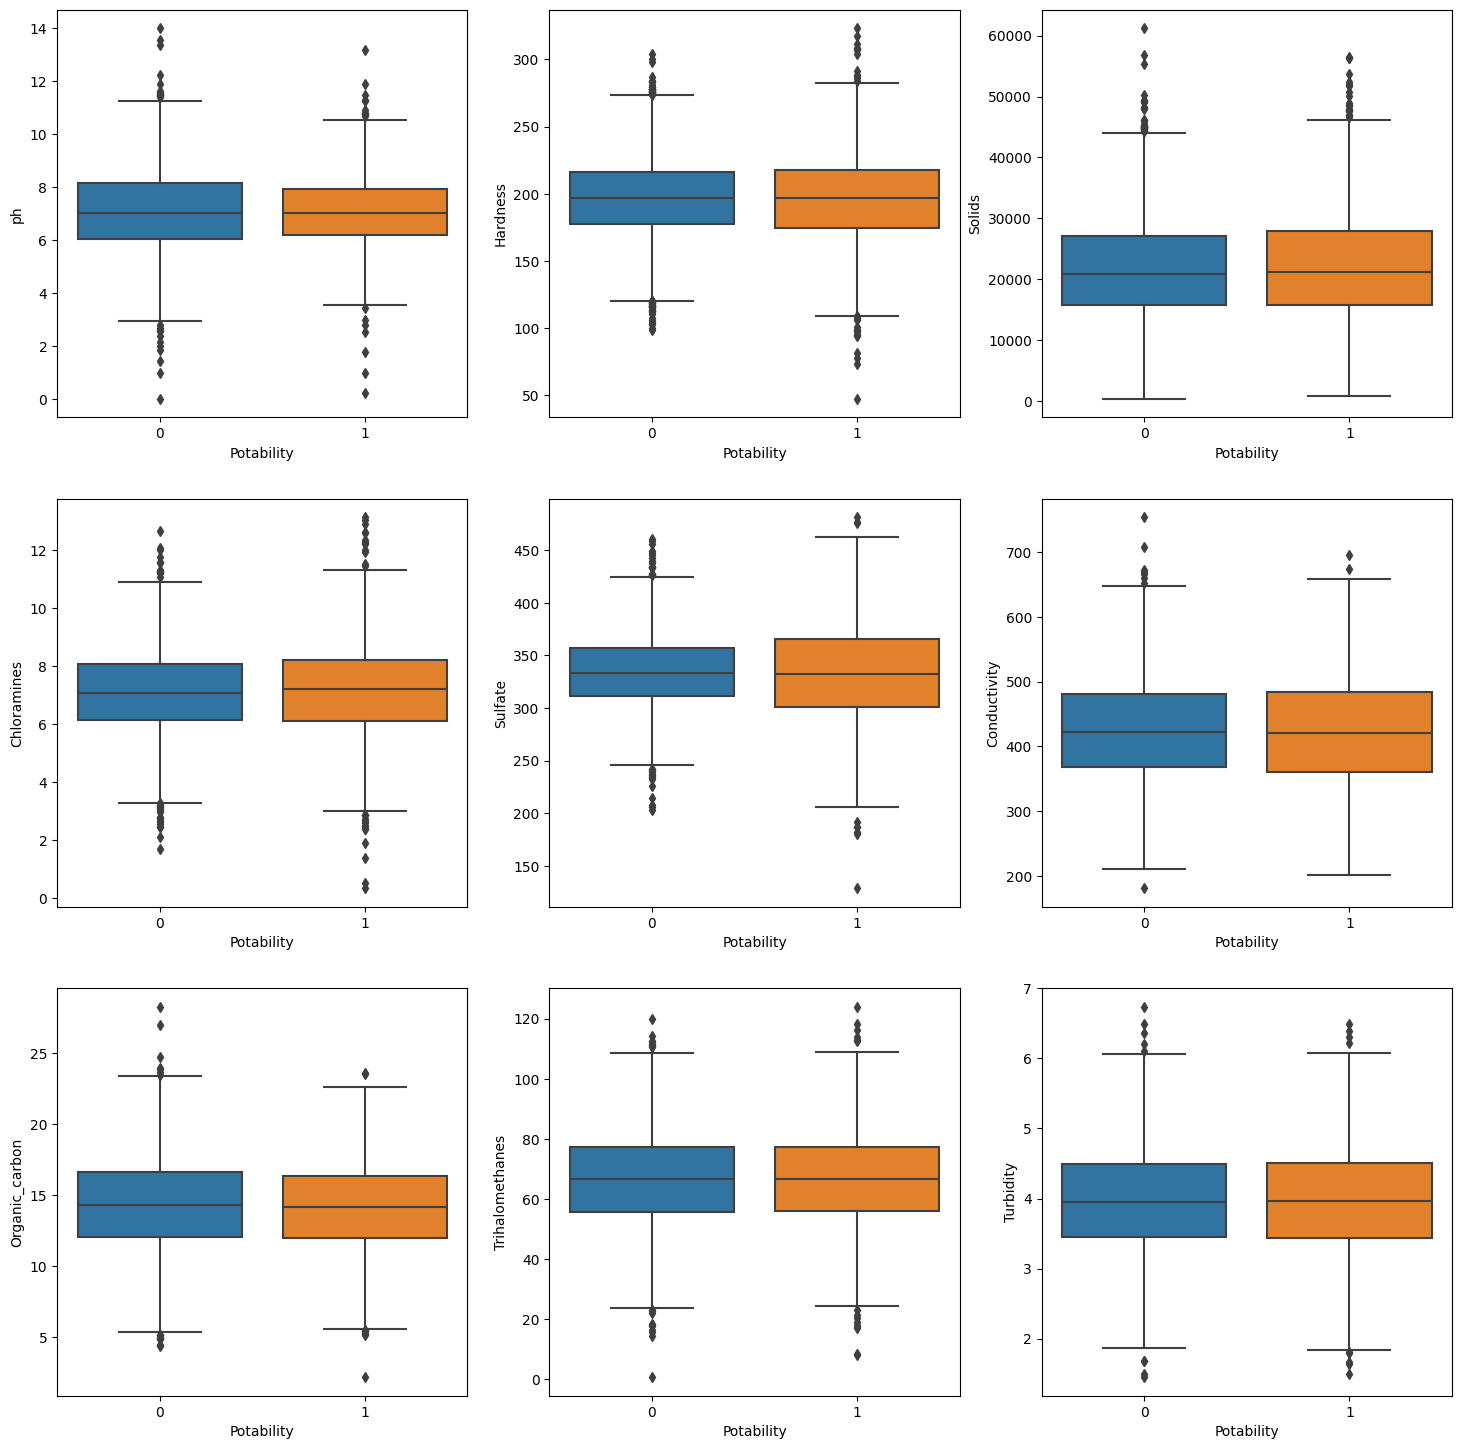

In [7]:
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(18, 18))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=df.Potability, y=df[attributes[k]], ax=axes[i,j])
        k=k+1


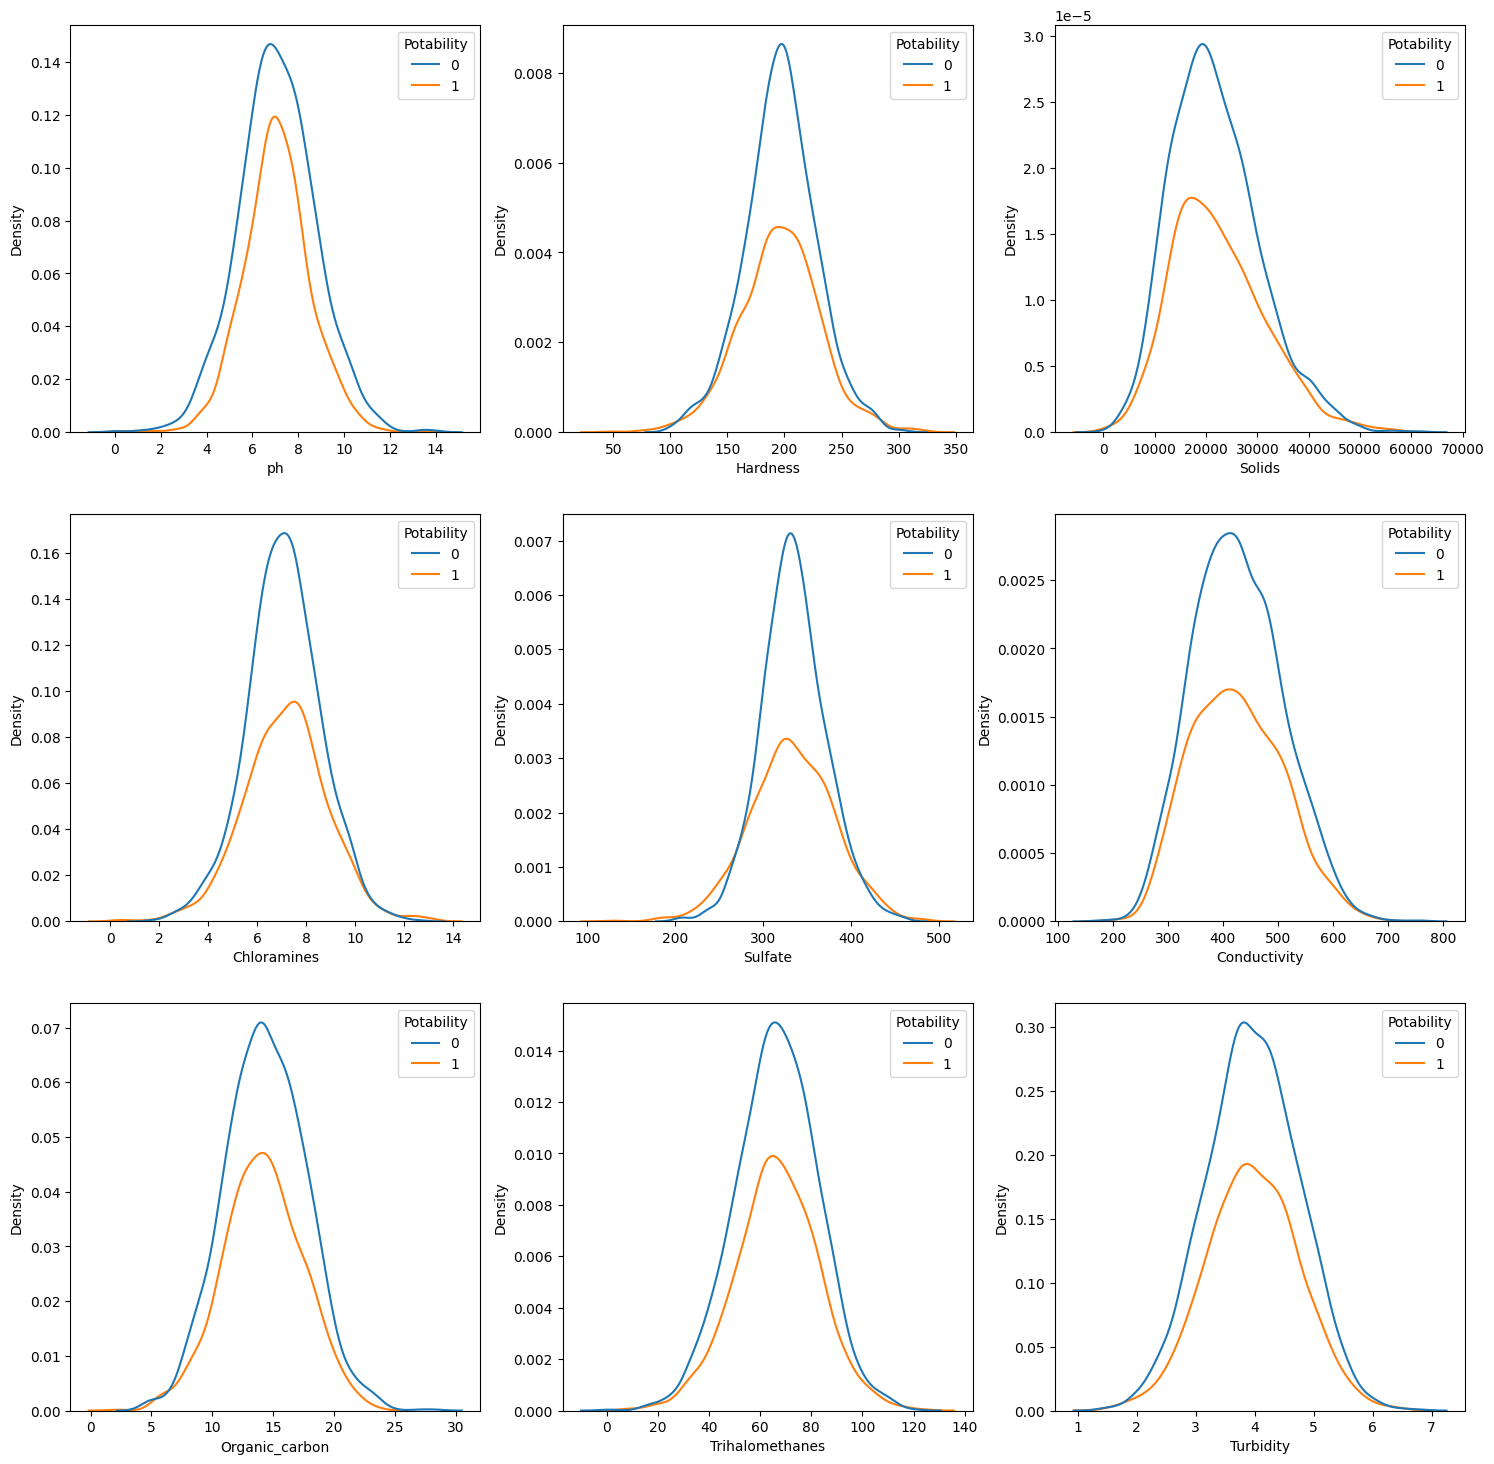

In [8]:
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(18, 18))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.kdeplot(hue=df.Potability, x=df[attributes[k]], ax=axes[i,j])
        k=k+1

Text(0.5, 1.0, 'Correlation Between Various Attributes')

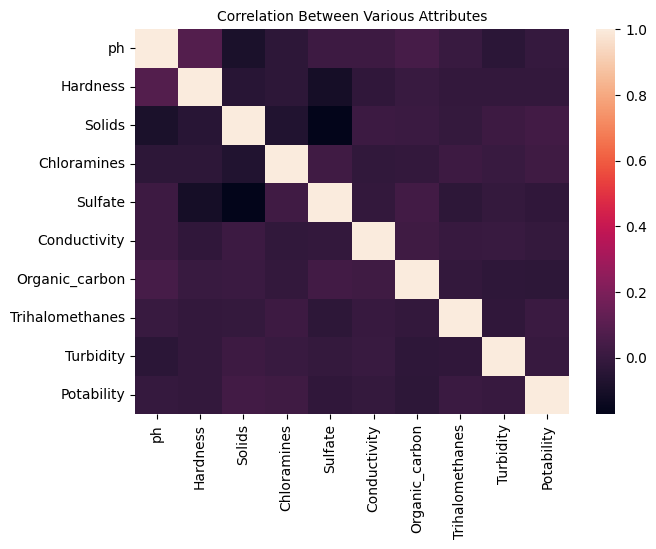

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())
plt.title('Correlation Between Various Attributes', fontsize=10)

In [10]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<Axes: >

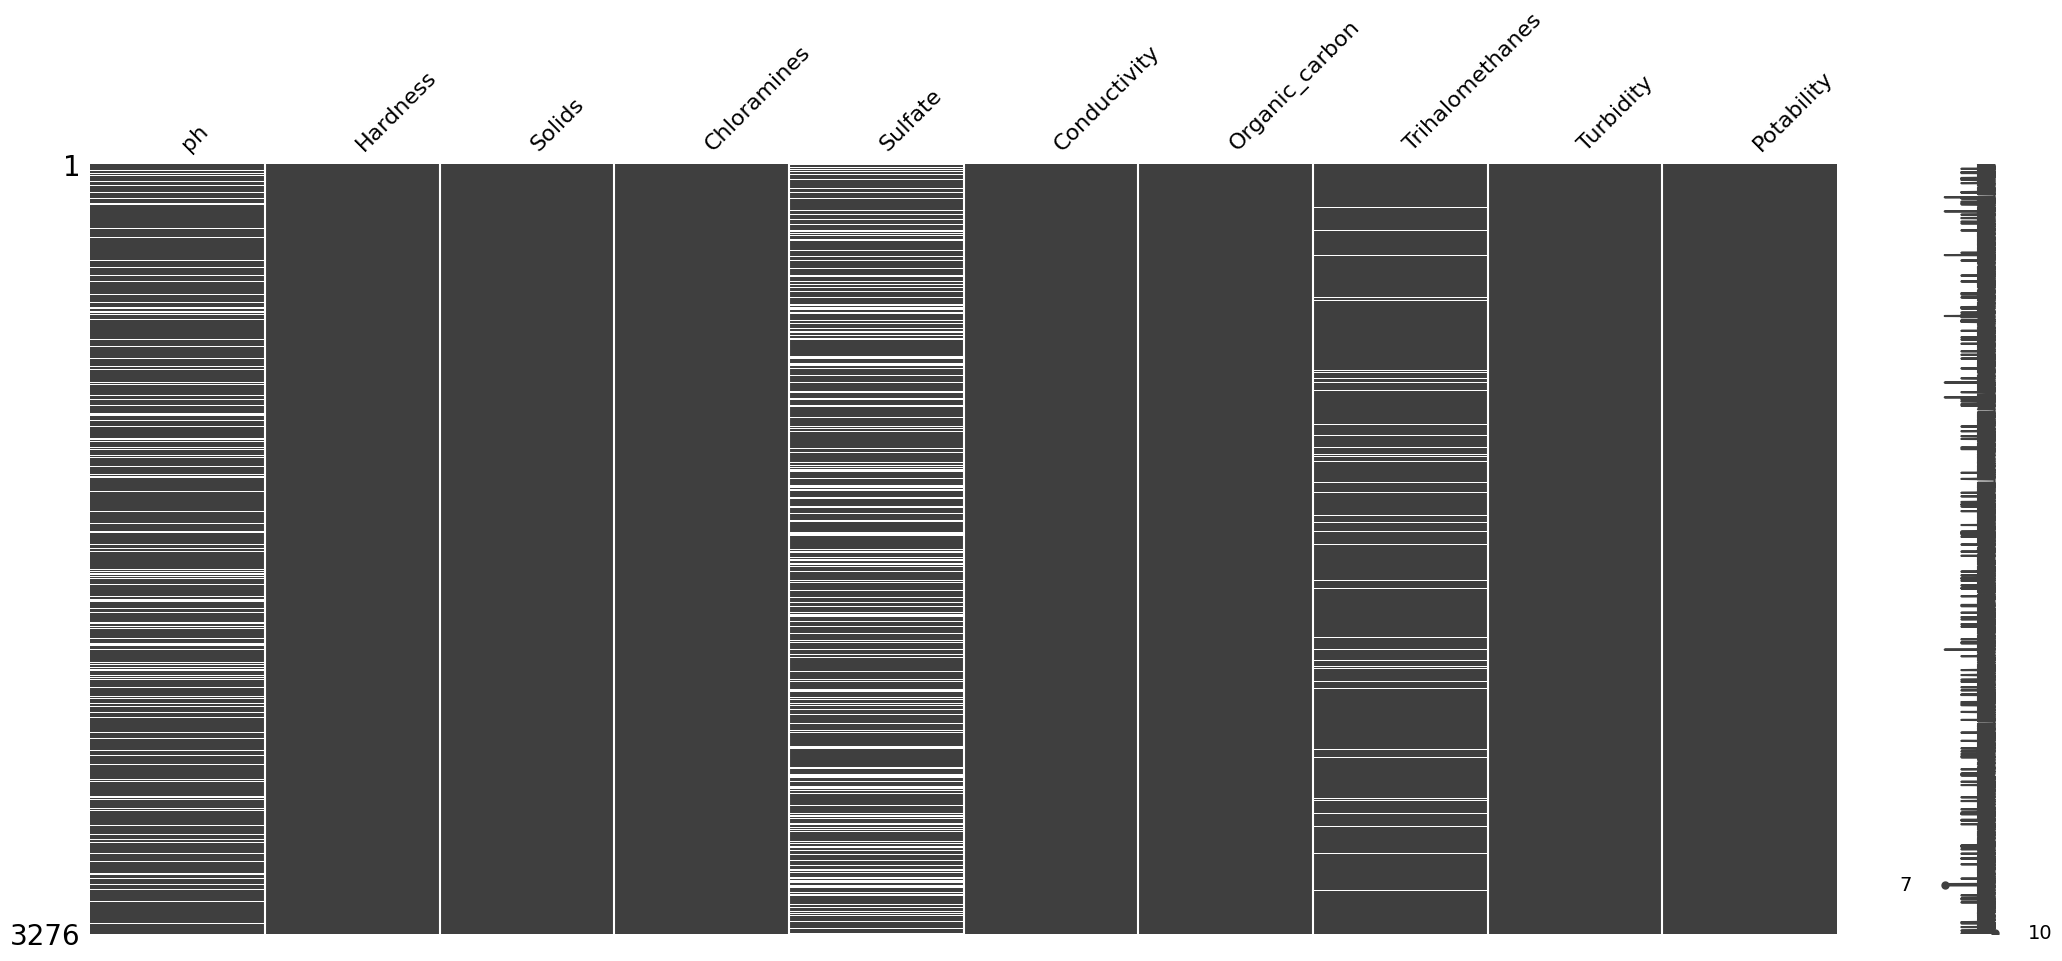

In [11]:
msno.matrix(df) #visualization for better analysis

In [12]:
X = df.drop('Potability', axis=1)
y = df['Potability']

ph_sulf_trihal_columns = ['ph', 'Sulfate', 'Trihalomethanes']
remaining_columns = [col for col in X.columns if col not in ph_sulf_trihal_columns]

df_transformed = ColumnTransformer(
    transformers=[
        ('ph_sulf_trihal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ]), ph_sulf_trihal_columns),
        ('remaining', StandardScaler(), remaining_columns)
    ])

X_transformed = df_transformed.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)
X_transformed_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-2.058835,0.884758,1.122338,0.259195,-0.139471,0.112415,1.708954,-1.180651,-1.286298
1,-0.787841,-1.651334,-0.321069,-2.036414,-0.385987,-0.307694,2.062575,0.270597,0.684218
2,0.711270,-1.651334,0.153965,0.847665,-0.240047,1.360594,-0.094032,0.781117,-1.167365
3,0.785709,0.761612,1.750822,0.547651,0.000493,0.592008,-0.778830,1.255134,0.848412
4,1.050935,0.266601,-1.466454,-0.464429,-0.460249,-0.363698,-0.343939,-0.824357,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-0.462226,0.794038,0.166562,-0.081758,2.916188,0.028027,1.240155,-0.118075,0.601124
3272,0.611991,-1.651334,-2.938016,-0.085667,-0.534295,0.593290,-0.417706,1.698560,-1.497627
3273,1.162876,-1.651334,0.315211,-0.626829,1.270810,0.144017,0.072263,-0.981329,-0.856007
3274,-0.305352,-1.651334,0.674996,1.041355,-1.144058,-0.517373,-0.288597,-0.942064,0.950797


In [13]:
X_transformed_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neural_network import MLPClassifier

# You can adjust the number of hidden layers and neurons in each layer
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [16]:
# Train the model
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [17]:
mlp.score(X_train,y_train)

0.9896946564885496

In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'max_iter': [200, 300, 500],
    # Add other hyperparameters you want to tune here
}

# Create the MLP classifier
mlp2 = MLPClassifier(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_2 = GridSearchCV(mlp2, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_2.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_2.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_2.best_score_))


Best Parameters:  {'hidden_layer_sizes': (100, 50), 'max_iter': 300}
Best Cross-validated Accuracy: 0.62


In [19]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
logistic_regression.score(X_train,y_train)

0.6049618320610687

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    # Add other hyperparameters you want to tune here
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_3 = GridSearchCV(logistic_regression, param_grid, cv=stratified_kfold_3, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_3.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_3.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_3.best_score_))




Best Parameters:  {'C': 0.001, 'penalty': 'l2'}
Best Cross-validated Accuracy: 0.61


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
decision_tree.score(X_train,y_train)

1.0

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # Add other hyperparameters you want to tune here
}

# Create the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_4 = GridSearchCV(decision_tree, param_grid, cv=stratified_kfold_4, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_4.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_4.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_4.best_score_))




Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-validated Accuracy: 0.61


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
random_forest.score(X_train,y_train)

1.0

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    # Add other hyperparameters you want to tune here
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_5 = GridSearchCV(random_forest, param_grid, cv=stratified_kfold_5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_5.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_5.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_5.best_score_))



Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-validated Accuracy: 0.66


In [28]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
xgb_classifier.score(X_train,y_train)

0.999618320610687

In [30]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    # Add other hyperparameters you want to tune here
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_6 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_6 = GridSearchCV(xgb_classifier, param_grid, cv=stratified_kfold_6, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_6.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_6.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_6.best_score_))



Best Parameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validated Accuracy: 0.65


In [31]:
from sklearn.neighbors import KNeighborsClassifier


# Create a k-Nearest Neighbors classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
knn_classifier.score(X_train,y_train)

0.7935114503816794

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    # Add other hyperparameters you want to tune here
}

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Create StratifiedKFold for cross-validation
stratified_kfold_7 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_7 = GridSearchCV(knn_classifier, param_grid, cv=stratified_kfold_7, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_7.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_7.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_7.best_score_))




Best Parameters:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Cross-validated Accuracy: 0.61


In [34]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [35]:
svm_classifier.score(X_train,y_train)

0.6923664122137405

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    # Add other hyperparameters you want to tune here
}

# Create the SVM classifier
svm_classifier = SVC(random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_8 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_8 = GridSearchCV(svm_classifier, param_grid, cv=stratified_kfold_8, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_8.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_8.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_8.best_score_))




Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validated Accuracy: 0.63


In [37]:
from sklearn.ensemble import AdaBoostClassifier

# You can replace DecisionTreeClassifier with another classifier if needed
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [38]:
adaboost_classifier.score(X_train,y_train)

1.0

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other hyperparameters you want to tune here
}

# Create the AdaBoost classifier with a Decision Tree base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Create StratifiedKFold for cross-validation
stratified_kfold_9 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_9 = GridSearchCV(adaboost_classifier, param_grid, cv=stratified_kfold_9, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_9.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_9.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search_9.best_score_))




Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-validated Accuracy: 0.57
